# Toronto Weather Prediction - Random Forest Learning Example

This is a case study into using a random forest classification approach in Scikit-Learn to analyze and predict temperatures for Toronto in 2017. Specifically, weather data from NOAA will be taken, roughly analyzed for trends, number of data points, etc. and then it will be split up into train/test data subsets for the algorithm to train and predict maximum temperatures. Methodology adopted from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 

In [1]:
#Implementation of Pandas - a tool used for data manipulation and exploration
import pandas as pd

#Read the data from the Toronto Weather data file; units for temperature are degrees Celcius
data = pd.read_csv('data.csv') #data set will be called data (so original)

#Since numpy can only make the array from integers, and it makes more sense to read temperature as an integer, the data will be rounded to integers
data=data.round(0)
data.head(20)

,Date,T_avg,T_max,T_min
0,2017-01-01,1.0,3.0,-1.0
1,2017-01-02,3.0,6.0,1.0
2,2017-01-03,3.0,5.0,2.0
3,2017-01-04,-2.0,4.0,-8.0
4,2017-01-05,-8.0,-6.0,-11.0
5,2017-01-06,-9.0,-6.0,-12.0
6,2017-01-07,-9.0,-7.0,-12.0
7,2017-01-08,-9.0,-8.0,-11.0
8,2017-01-09,-5.0,-1.0,-8.0
9,2017-01-10,3.0,7.0,-2.0


In [2]:
#Date = date of the weather incident
#T_Avg = average temperature (in degrees celcius)
#T_min = minimum temperature (in degrees celcius)
#T_max = maximum temperature (in degrees celcius)

#NOTE: Temperatures are not including windchill/humidity

#data characteristics:

print('The number of rows and columns available are:', data.shape, 'respectively') #rows x columns
row = data.shape[0]
col = data.shape[1]

The number of rows and columns available are: (350, 4) respectively


In [3]:
#Data seems to be accurate and comprehensive
data.describe() #summary statistics

,T_avg,T_max,T_min
count,350.000000,350.000000,350.000000
mean,9.991429,13.751429,6.225714
std,10.009304,10.717441,9.463725
min,-17.000000,-14.000000,-20.000000
25%,3.000000,5.000000,0.000000
50%,11.000000,14.000000,6.000000
75%,19.000000,23.000000,14.000000
max,27.000000,32.000000,22.000000


In [4]:
#Use pandas to split up the date column into 3 new columns for the respective year, month and day
data['Year']=[d.split('-')[0] for d in data.Date] 
data['Month']=[d.split('-')[1] for d in data.Date]
data['Day']=[d.split('-')[2] for d in data.Date]

#check that it worked
data.head(5)

,Date,T_avg,T_max,T_min,Year,Month,Day
0,2017-01-01,1.0,3.0,-1.0,2017,01,01
1,2017-01-02,3.0,6.0,1.0,2017,01,02
2,2017-01-03,3.0,5.0,2.0,2017,01,03
3,2017-01-04,-2.0,4.0,-8.0,2017,01,04
4,2017-01-05,-8.0,-6.0,-11.0,2017,01,05


In [5]:
#With the year, month and day split up into seperate columns, now we can make proper date strings
import datetime 
#Convert the yyyy-mm-dd string into a date time object

#Get the relevant information about the dates
year = data['Year']
months = data['Month']
days = data['Day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(year, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


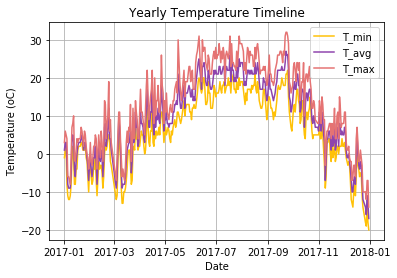

In [6]:
#plotting the data to see trends
import matplotlib.pyplot as plt 

%matplotlib inline

#Code below modified from a tutorial; link: https://www.datascience.com/blog/learn-data-science-intro-to-data-visualization-in-matplotlib 
# Define a function for a plot with two y axes
def lineplot3y(x_data, x_label, y1_data, y1_color, y_label, y2_data, y2_color, y3_data, y3_color, title):
    plt.plot(x_data, y1_data, y1_color)
    plt.plot(x_data, y2_data, y2_color)
    plt.plot(x_data, y3_data, y3_color)
    plt.xlabel('Date')
    plt.ylabel('Temperature (oC)')
    plt.title('Yearly Temperature Timeline')
    plt.grid(True)
    plt.legend()
    # Set figure width to 12 and height to 9
    fig_size= (15,9)
    plt.rcParams["figure.figsize"] = fig_size

# Call the function to create plot
pl=lineplot3y(x_data = dates
            , y1_data = data['T_min']
            , y2_data = data['T_avg']
            , y3_data = data['T_max']
            , x_label = 'Date'
            , y_label = 'Temperature (oC)'
            , y1_color = '#FFC107'
            #, y2_label = 'Max Temperature (oC)'
            , y2_color = '#8E44AD'
            , y3_color = '#E57373'
            , title = 'Average Temperature Timeline')

# format the x-axis ticks
#ax.xaxis.set_major_locator(data['Months'])

The graphed data shows that the 2017 Toronto weather dataset is accurate in that, the temperature distribution throughout the year is periodic (i.e. if we took 2016 and 2017 and added it to this, it would appear similar and sinusoidal).

Predicting the weather for 2017 is a fairly trivial task since all of the data is pre-recorded and known. This is more an exercise into exploring basic Machine Learning. However, to take this to the next level and predict 2018 data a few things are needed to note:

To accurately predict 2018 temperatures, some  data from 2018 will need to be included into the algorithm for the sake of recency (e.g. 2018 underwent a significant heatwave in May that did not happen in 2017, therefore if no data of 2018 is added into the model to represent this, the model of data we have from 2017 would not capture the event and thus provide a flawed reading). More robust analysis can also come from adding more historical data to the analysis (i.e. 2010-2017; consider for extension of this project)

For current state, I will use the data as-is and feed into the scikit model just to see what happens for 2017 weather predictions.

Since the date column is a string (i.e. a categorical value), in order for the ML to understand it, it will require one-hot encoding

However, since there are 300+ values to encode, this will make a very complex matrix.

We already have the year/month/day from before in new columns (above). So instead of one-hot encoding the date column, into a potentially 300x300 matrix, it will be easier to remove the column altogether and work with the individual YMD columns. 

In [7]:
#Remove the date column so that numeric data is contained
data=data.drop('Date',axis=1)
data.head(20)

,T_avg,T_max,T_min,Year,Month,Day
0,1.0,3.0,-1.0,2017,01,01
1,3.0,6.0,1.0,2017,01,02
2,3.0,5.0,2.0,2017,01,03
3,-2.0,4.0,-8.0,2017,01,04
4,-8.0,-6.0,-11.0,2017,01,05
5,-9.0,-6.0,-12.0,2017,01,06
6,-9.0,-7.0,-12.0,2017,01,07
7,-9.0,-8.0,-11.0,2017,01,08
8,-5.0,-1.0,-8.0,2017,01,09
9,3.0,7.0,-2.0,2017,01,10


### Convert data to arrays

In [8]:
#With data as is, use numpy to convert data to arrays
import numpy as np

#Labels = values that we want to predict
labels = np.array(data['T_max'])

#Remove the labels from the data
#axis 1 = columns
data=data.drop('T_max', axis=1)

#Saving the names for future use
data_list = list(data.columns)

#Convert to an array and ensure proper form
data = np.array(data)
print(data)

[[1.0 -1.0 '2017' '01' '01']
 [3.0 1.0 '2017' '01' '02']
 [3.0 2.0 '2017' '01' '03']
 ..., 
 [-11.0 -14.0 '2017' '12' '29']
 [-13.0 -18.0 '2017' '12' '30']
 [-17.0 -20.0 '2017' '12' '31']]


### Training and Testing Sets

In [9]:
#Using Skicit-Learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)

print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (262, 5)
Training Labels Shape: (262,)
Testing Features Shape: (88, 5)
Testing Labels Shape: (88,)


In [10]:
#The baseline predictions are the historical averages
baseline_preds = test_data[:, data_list.index('T_avg')]

#Baseline errors and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees')

Average baseline error:  3.55 degrees


### Import and Train Model 

In [11]:
#Import the model to be used (random forest) and begin training the model to make predictions
from sklearn.ensemble import RandomForestRegressor

#initiate model
rf = RandomForestRegressor(n_estimators = 1000, random_state=42)

#train model with the training data
rf.fit(train_data, train_labels);

In [12]:
#Make predictions on the test data
#Use the random forest model to make predictions on the test data
predictions = rf.predict(test_data)

#Calculate the absolute errors
errors=abs(predictions - test_labels)

#Print the absolute error
print('mean absolute error:', round(np.mean(errors), 2), 'degrees')

mean absolute error: 0.8 degrees


### Detemination of performance metrics from test data

In [13]:
#Determination of performance metrics

#Calculate mean absolute percent error
mape = 100*(errors/test_labels)

#Accuracy display
accuracy = 100 - np.mean(mape)
print('Accuracy (%): ', round(accuracy, 2))

Accuracy (%):  94.64


Model is apparently ~95% accurate. Want to evaluate the predicted data vs. the actual data and see correlations.

If data is accurate enough and matches everything, then an exploration into the ML through process will occur. Else, model will be improved

In [14]:
#Dates of training values
months = data[:, data_list.index('Month')]
days = data[:, data_list.index('Day')]
years = data[:, data_list.index('Year')]

#Convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(year, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
print(true_data)

# Dates of predictions
months = test_data[:, data_list.index('Month')]
days = test_data[:, data_list.index('Day')]
years = test_data[:, data_list.index('Year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
print(test_dates)

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

     actual       date
0       3.0 2017-01-01
1       6.0 2017-01-02
2       5.0 2017-01-03
3       4.0 2017-01-04
4      -6.0 2017-01-05
5      -6.0 2017-01-06
6      -7.0 2017-01-07
7      -8.0 2017-01-08
8      -1.0 2017-01-09
9       7.0 2017-01-10
10      8.0 2017-01-11
11     10.0 2017-01-12
12     -1.0 2017-01-13
13     -2.0 2017-01-14
14      1.0 2017-01-15
15      4.0 2017-01-16
16      3.0 2017-01-17
17      4.0 2017-01-18
18      4.0 2017-01-19
19      4.0 2017-01-20
20      7.0 2017-01-21
21      6.0 2017-01-22
22      4.0 2017-01-23
23      2.0 2017-01-24
24      6.0 2017-01-25
25      5.0 2017-01-26
26      2.0 2017-01-27
27      0.0 2017-01-28
28     -1.0 2017-01-29
29     -4.0 2017-01-30
..      ...        ...
320     8.0 2017-11-30
321     8.0 2017-12-01
322    11.0 2017-12-02
323    11.0 2017-12-03
324     3.0 2017-12-04
325     1.0 2017-12-05
326     1.0 2017-12-06
327     2.0 2017-12-07
328    -1.0 2017-12-08
329    -2.0 2017-12-09
330    -2.0 2017-12-10
331    -7.0

## Evaluate Model Results and Accuracy

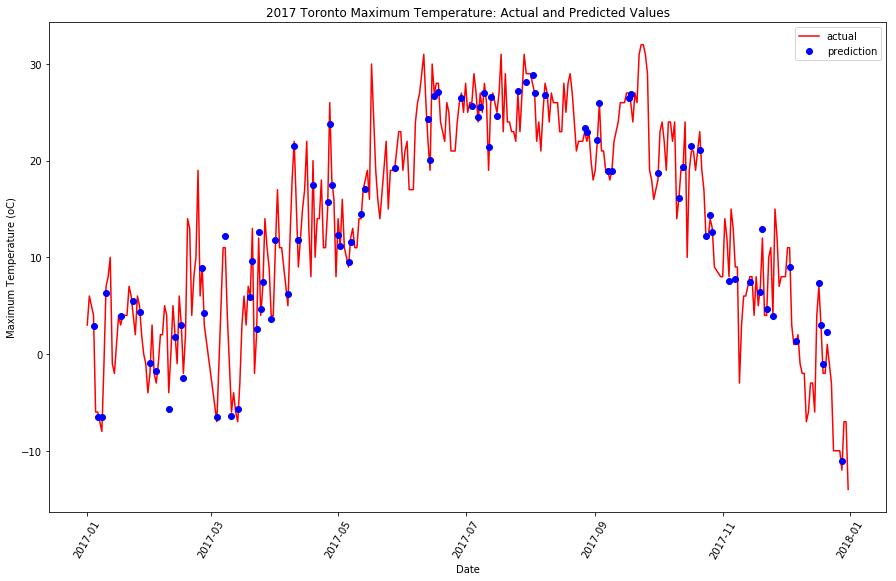

In [15]:
#Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'r-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'bo', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

#Graph Labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (oC)'); plt.title('2017 Toronto Maximum Temperature: Actual and Predicted Values');

In [20]:
#Get importances of variables in the model. Hypothesis is that average temperature will have the highest significance since it is the value which potentially matches the most closely with max temperature
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
data_importances = [(feature, round(importance, 5)) for feature, importance in zip(data_list, importances)]

# Sort the feature importances by most important first
data_importances = sorted(data_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in data_importances];

Variable: T_avg                Importance: 0.9868
Variable: T_min                Importance: 0.00747
Variable: Day                  Importance: 0.00379
Variable: Month                Importance: 0.00194
Variable: Year                 Importance: 0.0


### Write a conclusion, explanation into the statistics/background into the random forest model (for own knowledge purposes) and finesse Jupyter Notebook/results